This script does the binary classification on news articles about FLOOD (is about flood or Not). This classifier used the open source Glove pre-trained embedding words. The work is based on the work of Sie Huai Gan on Spam email detection (https://towardsdatascience.com/email-spam-detection-1-2-b0e06a5c0472).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Download the glove embedding

!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-15 03:39:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-15 03:39:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-15 03:39:56--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.6B.50d.txt        
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.6B.100d.txt       
replace glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.6B.200d.txt       y

replace glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: glove.6B.300d.txt       y



In [ ]:
!python -m gensim.scripts.glove2word2vec -i glove.6B.300d.txt -o glove.6B.300d.word2vec.txt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'gensim.scripts.glove2word2vec' found in sys.modules after import of package 'gensim.scripts', but prior to execution of 'gensim.scripts.glove2word2vec'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-06-15 03:44:31,839 - glove2word2vec - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/glove2word2vec.py -i glove.6B.300d.txt -o glove.6B.300d.word2vec.txt
2021-06-15 03:44:32,403 - glove2word2vec - INFO - converting 400000 vectors from glove.6B.300d.txt to glove.6B.300d.word2vec.txt
2021-06-15 03:44:47,429 - glove2word2vec - INFO - Converted model with 400000 vectors and 300 dimensions


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving All.csv to All.csv


In [ ]:
df = pd.read_csv('All.csv', encoding = "ISO-8859-1")
df['label'] = df['categories'].apply(lambda x: 1 if x=='flood' else 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = df.drop(columns = [c for c in df.columns if c.startswith('Unnamed')])


In [ ]:
df = df.dropna(subset = ["article_content"], axis= 0)

In [ ]:
df.head()

,id,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,categories,label
0,0,http://floodlist.com/africa/kenya-floods-may-2021,Kenya: Floods - Emergency Plan of Action (EPoA...,https://reliefweb.int/report/kenya/kenya-flood...,A. Situation analysis\n\nDescription of the di...,"Tue, 27 Apr 2021 07:00:00 GMT",https://reliefweb.int/sites/reliefweb.int/file...,"['n', 'mdrke047', 'rift', 'parts', 'rainfall',...",,flood,1
1,1,http://floodlist.com/africa/kenya-floods-may-2021,Kenya: Floods - Final Report Appeal nÃÂÃÂÃ...,https://reliefweb.int/report/kenya/kenya-flood...,A. SITUATION ANALYSIS\n\nDescription of the di...,"Fri, 30 Apr 2021 07:00:00 GMT",https://reliefweb.int/sites/reliefweb.int/file...,"['n', 'rains', 'rainfall', 'parts', 'country',...",,flood,1
2,2,http://floodlist.com/africa/kenya-floods-may-2021,How Kenya Copes with Thousands of Displaced Cl...,https://time.com/5953402/climate-migrants-keny...,"When he was a child, James Owuor loved hearing...","Thu, 22 Apr 2021 07:00:00 GMT",https://api.time.com/wp-content/uploads/2021/0...,"['lake', 'change', 'm', 'displaced', 'adaptati...",,none,0
3,3,http://floodlist.com/africa/kenya-floods-may-2021,Kenya's climate resilience under strain amid r...,http://www.xinhuanet.com/english/africa/2021-0...,Source: Xinhua| 2021-05-14 20:48:12|Editor: hu...,"Fri, 14 May 2021 12:48:12 GMT",NaN,"['past', 'green', 'local', 'realize', 'parts',...",,flood,1
4,4,http://floodlist.com/africa/kenya-floods-may-2021,"Floods, traffic mess as heavy rains pound Nair...",https://nairobinews.nation.co.ke/editors-picks...,A man jumps over a flooded section of Universi...,"Mon, 10 May 2021 07:00:00 GMT",https://nairobinews.nation.co.ke/wp-content/up...,"['road', 'nairobi', 'mess', 'heavy', 'flooded'...",,flood,1


In [ ]:
df.shape

(7823, 11)

In [ ]:
print(df['label'].value_counts())

1    4194
0    3629
Name: label, dtype: int64


In [ ]:
y = (df.pop('label')).to_numpy()
X = (df.pop('article_content')).to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [ ]:
import unicodedata

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize



#remove hyperlink:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)


#change to lower case:
def to_lower(word):
    result = word.lower()
    return result


#remove punctuation
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

#remove whitespace
def remove_whitespace(word):
    result = word.strip()
    return result

#remove Number- Not sure if we need it!!
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

#remove newline:
def replace_newline(word):
    return word.replace('\n','')


def remove_accented_chars(word):
    word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return word





def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_accented_chars,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence


x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


x_train = [word_tokenize(o) for o in x_train]
x_test = [word_tokenize(o) for o in x_test]


def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result



def word_stemmer(words):
    return [stemmer.stem(o) for o in words]



def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]


def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_stemmer,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words


x_train = [clean_token_pipeline(o) for o in x_train]
x_test = [clean_token_pipeline(o) for o in x_test]

In [ ]:
from gensim.models import KeyedVectors

w2v = KeyedVectors.load_word2vec_format('glove.6B.300d.word2vec.txt',binary=False)

EXTRACTING FEATURES FROM WORDS

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
maxlen = 60
max_features = 50000

In [ ]:
EMBEDDING_FILE = 'glove.6B.300d.txt'
tokenizer = Tokenizer(num_words=max_features)

In [ ]:
tokenizer.fit_on_texts(x_train)

In [ ]:
x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features = pad_sequences(x_train_features,maxlen=maxlen)
x_test_features = pad_sequences(x_test_features,maxlen=maxlen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
word_index = tokenizer.word_index
nb_words = max_features
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
        

In [ ]:
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 60, 300)           15000000  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60, 128)           140544    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17  

In [ ]:
model.layers[1].trainable = False

In [ ]:
history = model.fit(x_train_features,y_train, batch_size=512, epochs=20, 
          validation_data=(x_test_features, y_test))

Epoch 1/20
13/13 [==============================] - 5s 268ms/step - loss: 0.6690 - accuracy: 0.5793 - val_loss: 0.5855 - val_accuracy: 0.7734
Epoch 2/20
13/13 [==============================] - 2s 185ms/step - loss: 0.5452 - accuracy: 0.8068 - val_loss: 0.4966 - val_accuracy: 0.8211
Epoch 3/20
13/13 [==============================] - 2s 190ms/step - loss: 0.4445 - accuracy: 0.8559 - val_loss: 0.4102 - val_accuracy: 0.8535
Epoch 4/20
13/13 [==============================] - 2s 189ms/step - loss: 0.3455 - accuracy: 0.8881 - val_loss: 0.3365 - val_accuracy: 0.8697
Epoch 5/20
13/13 [==============================] - 2s 186ms/step - loss: 0.2593 - accuracy: 0.9169 - val_loss: 0.2882 - val_accuracy: 0.8850
Epoch 6/20
13/13 [==============================] - 2s 187ms/step - loss: 0.2014 - accuracy: 0.9277 - val_loss: 0.2712 - val_accuracy: 0.8910
Epoch 7/20
13/13 [==============================] - 2s 187ms/step - loss: 0.1700 - accuracy: 0.9333 - val_loss: 0.2685 - val_accuracy: 0.8867
Epoch 

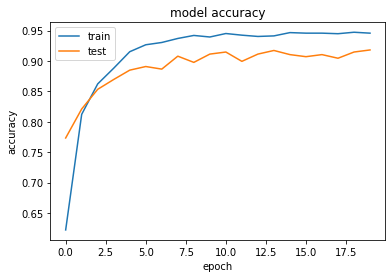

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [ ]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

In [ ]:
confusion_matrix(y_test,y_predict)

array([[502,  57],
       [ 39, 576]])

In [ ]:
f1_score(y_test,y_predict)

0.923076923076923

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test,y_predict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[502  57]
 [ 39 576]]


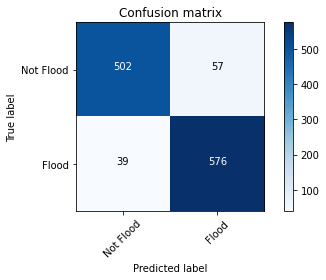

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Flood','Flood'], normalize=False,
                      title='Confusion matrix')